## <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">今回の分析プラン</h3>
     
> ### 1. データの全体像を把握する

> ### 2. データを整える

> ### 3. 特徴量の作成

> ### 4. カテゴリー変数の変換

> ### 5. 外れ値の検出

> ### 6. 機械学習

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

## 今回取り組むコンペティション
***
コンペの目的は、アイオワ州エイムズ市の住宅の販売価格を予測することです。  
予測誤差を最小にする為に、特徴量エンジニアリングと回帰アルゴリズムを実践します。

# 1 . データの全体像を把握する
***
始める前に、データセットにアルファベットを使って名前を付けておきます。
        
         a = train
         b = test
         c = combination (train + test)

trainとtestを読み込んで開いていきます。

In [10]:
a = pd.read_csv("./input/train.csv")
b = pd.read_csv('./input/test.csv')

In [11]:
# このコードを使用して、すべての列(163列)を表示します。 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

* 多くの特徴量そして多くの欠損値があります。  
* "SalePrice"は、今回予測することになっている住宅の価格です。

In [12]:
a.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [13]:
print('train : %sの要素と%sの特徴量があります。'%(a.shape[0],a.shape[1]))
print('test : %sの要素と%sの特徴量があります'%(b.shape[0],b.shape[1]))
print('testはtrainよりも特徴量が1つ少なくなっており、その残り1つが予測対象であるSalePriceです。')

train : 1460の要素と81の特徴量があります。
test : 1459の要素と80の特徴量があります
testはtrainよりも特徴量が1つ少なくなっており、その残り1つが予測対象であるSalePriceです。


まずは、数値特徴量とSalePriceの相関関係を見てみましょう。下のヒートマップを見ると、濃い色が多く、SalePriceとの相関性が高い特徴量が多いことがわかります。

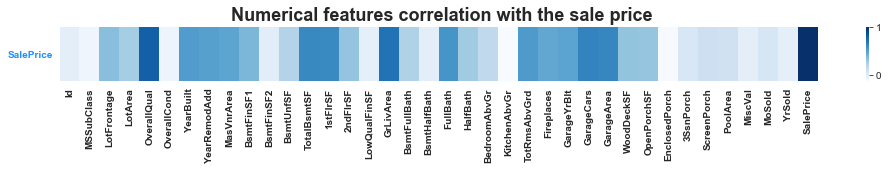

In [14]:
num=a.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

次にSalePriceとの相関係数が高い特徴量トップ10を見てみましょう。

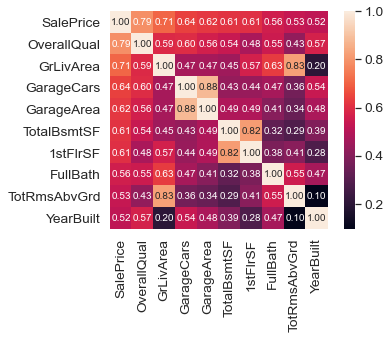

In [15]:
# ヒートマップに表示する列数
k = 10

cols = numcorr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(a[cols].values.T)

sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

このヒートマップから、全体的な品質(OverallQual), リビングの広さ(GrLivArea), 地下室の広さ(TotalBsmtSF), 車庫の広さと収容可能台数(GarageArea, GarageCars)は、販売価格と最も高い相関値を持っており、「家の品質 + 家の面積 = 家の価格」だと考えることができます。  
  
* バスタブが充実している(FullBath)、1階の面積が広い(1stFlrSF)などの特徴は、高級感があるほど価格が高くなるという相関関係が考えられます。  
   
* 築年数(YearBuilt)が新しいほど販売価格が高いという相関関係もあるようです。


> * 下のグラフは2つの特徴量の間に強い相関関係がある場合のグラフです。(*SalePriceとGrLivArea*)

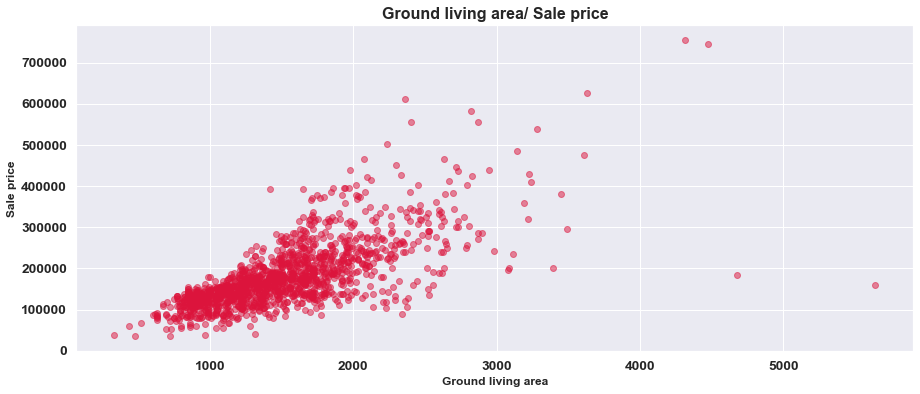

In [16]:
plt.figure(figsize=(15,6))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color='crimson', alpha=0.5)
plt.title('Ground living area/ Sale price', weight='bold', fontsize=16)
plt.xlabel('Ground living area', weight='bold', fontsize=12)
plt.ylabel('Sale price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

データをさらに掘り下げてみましょう。カテゴリカル特徴量は非常に重要になると考えられます。 例えば、地域の特徴などがとても重要になるでしょう。 交通面、生活の利便性、安全性など地域によって住みやすさの良し悪しがある為、最も重要なことであるとも考えられます。
> 下のグラフはカテゴリカルな特徴量の地域別物件数(Neighborhood)のグラフです。

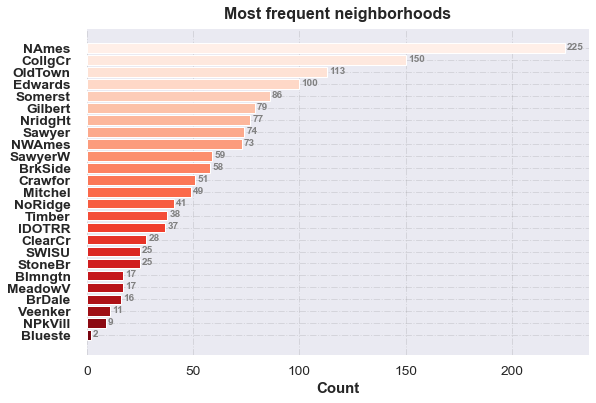

In [17]:
fig, ax = plt.subplots(figsize=(9,6))


title_cnt=a.Neighborhood.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Reds',len(title_cnt)))



for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)


ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')


ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)


ax.invert_yaxis()


ax.set_title('Most frequent neighborhoods',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')



for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')


plt.show()

下のグラフは建物の種類別物件数です。  
* 一戸建て(1Fam)
* 二世帯住宅の改築、元々は一世帯住宅として建てられたもの(2FmCon)
* 二世帯住宅(Duplx)
* エンドユニットタウンハウス(TwnhsE)
* インサイドユニットタウンハウス(TwnhsI)  
  
※タウンハウスとはマンションやアパートのような集合住宅の一種

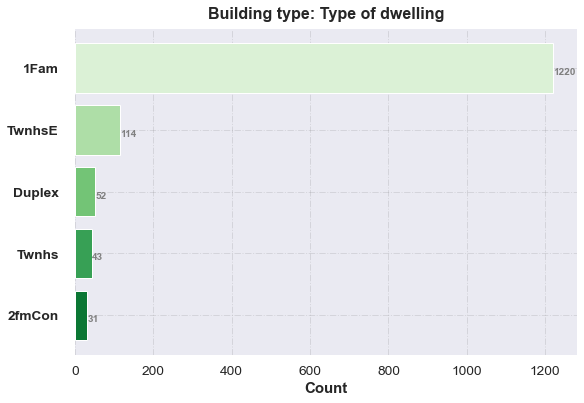

In [18]:
fig, ax = plt.subplots(figsize=(9,6))

title_cnt=a.BldgType.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Greens',len(title_cnt)))


for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

ax.invert_yaxis()

ax.set_title('Building type: Type of dwelling',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')


plt.show()

* ここで一度カテゴリカル特徴量から離れ、欠損値をクリーニングすることから始めます。  

In [19]:
na = a.shape[0]
nb = b.shape[0]
y_train = a['SalePrice'].to_frame()
# combination sets
c1 = pd.concat((a, b), sort=False).reset_index(drop=True)
# SalePriceとIdを削除します。
c1.drop(['SalePrice'], axis=1, inplace=True)
c1.drop(['Id'], axis=1, inplace=True)
print(f"データサイズ : {c1.shape}")

データサイズ : (2919, 79)


# 2 . データを整える
***
   > ### 2.1 : 80%以上の欠損値を持つ特徴量
   
最初にすべきことは、欠損値が80%以上のカラムを取り除くことです*(下図)*。例えばPoolQCの欠損値は、建物にプールがないことを表しており、これは非常に有益な情報です。しかし、それら（80%以上）の欠損値を「プールなし」に置き換えると、分散の低い特徴量が残り、分散の低い特徴量は機械学習モデルにとって一様なものになります。そこで、80%以上の欠損値を持つ特徴量を削除します。

In [20]:
def msv1(data, thresh=80, color='black', edgecolor='black', width=15, height=3):
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

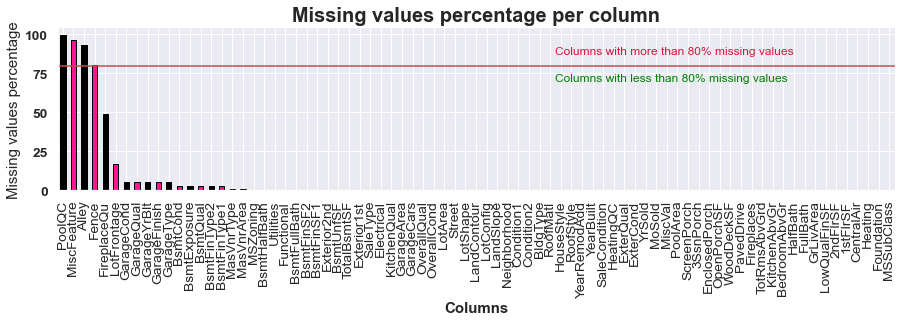

In [21]:
msv1(c1, 80, color=('black', 'deeppink'))

* 4つの特徴量が80%以上欠損値を持っていました。

* trainとtestの結合データを用いて、データ整形と特徴量エンジニアリングを実行します。

In [22]:
c=c1.dropna(thresh=len(c1)*0.2, axis=1)
print(f"trainとtestの結合データ(combination)から{c1.shape[1] - c.shape[1]}つの特徴量を削除しました。")

trainとtestの結合データ(combination)から4つの特徴量を削除しました。


ここで、データクリーニングを行う前に欠損値から埋めていきます。  
欠損値が1、2個しかない特徴量から先に埋めていきます。

In [23]:
allna = (c.isnull().sum() / len(c))*100
allna = allna.drop(allna[allna == 0].index).sort_values()

def msv2(data, width=12, height=8, color=('silver', 'gold','lightgreen','skyblue','lightpink'), edgecolor='black'):

    fig, ax = plt.subplots(figsize=(width, height))

    allna = (data.isnull().sum() / len(data))*100
    tightout= 0.008*max(allna)
    allna = allna.drop(allna[allna == 0].index).sort_values().reset_index()
    mn= ax.barh(allna.iloc[:,0], allna.iloc[:,1], color=color, edgecolor=edgecolor)
    ax.set_title('Missing values percentage per column', fontsize=15, weight='bold' )
    ax.set_xlabel('Percentage', weight='bold', size=15)
    ax.set_ylabel('Features with missing values', weight='bold')
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    for i in ax.patches:
        ax.text(i.get_width()+ tightout, i.get_y()+0.1, str(round((i.get_width()), 2))+'%',
            fontsize=10, fontweight='bold', color='grey')
    return plt.show()

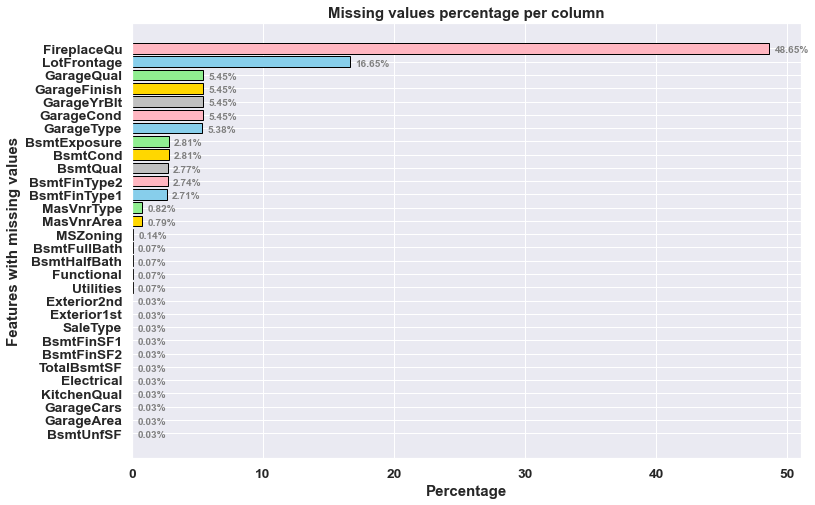

In [24]:
msv2(c)

In [25]:
print(f'80%以上の欠損値を持つ特徴量を削除した後の結合データ. {c.shape}')

80%以上の欠損値を持つ特徴量を削除した後の結合データ. (2919, 75)


全ての欠損値を結合データのから取り出し、それらをどのように扱うか考えます。

In [26]:
NA=c[allna.index.to_list()]

取り出した欠損値リストを2種に分類します。
* カテゴリー変数
* 数値変数

In [27]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print(f'欠損値を持つ{NAcat.shape[1]}個のカテゴリカル特徴量があります。')
print(f'欠損値を持つ{NAnum.shape[1]}個の数値特徴量があります。')

欠損値を持つ19個のカテゴリカル特徴量があります。
欠損値を持つ11個の数値特徴量があります。


ということで、19個のカテゴリカル特徴量と10個の数値特徴量を加工していきます。
* 先に数値特徴量から加工していきます。まず最初にすべきことはそれらの特徴量についての詳細を見て、データ加工の方法を考えていきます。
- 例えば、GarageArea、GarageCarsなどの欠損値は、単に家にガレージがないために存在しないと仮定しているため、ほとんどの機能は0で埋められます。
- ガレージの築年数(GarageYrBlt)の欠損値は0で埋めることはできませんので、中央値（1980年）で埋めます。

> ### 2.2 数値特徴量

In [28]:
NAnum.head()

BsmtUnfSF  GarageArea  GarageCars  TotalBsmtSF  BsmtFinSF2  BsmtFinSF1  \
0      150.0       548.0         2.0        856.0         0.0       706.0   
1      284.0       460.0         2.0       1262.0         0.0       978.0   
2      434.0       608.0         2.0        920.0         0.0       486.0   
3      540.0       642.0         3.0        756.0         0.0       216.0   
4      490.0       836.0         3.0       1145.0         0.0       655.0   

   BsmtHalfBath  BsmtFullBath  MasVnrArea  GarageYrBlt  LotFrontage  
0           0.0           1.0       196.0       2003.0         65.0  
1           1.0           0.0         0.0       1976.0         80.0  
2           0.0           1.0       162.0       2001.0         68.0  
3           0.0           1.0         0.0       1998.0         60.0  
4           0.0           1.0       350.0       2000.0         84.0

In [29]:
#石積みベニヤの面積(MasVnrArea)の欠損値はベニヤが無いことを意味するので、0で埋めます。
c['MasVnrArea']=c.MasVnrArea.fillna(0)
#敷地に接続された道路の長さ(LotFrontage)の欠損値(16%)は中央値で埋めます。
c['LotFrontage']=c.LotFrontage.fillna(c.LotFrontage.median())
#ガレージの築年数(GarageYrBlt)の欠損値も中央値で埋めます。
c['GarageYrBlt']=c["GarageYrBlt"].fillna(1980)

> ### 2.3 カテゴリカル特徴量
欠損値を持つカテゴリカル特徴量が18個あります。
* いくつかの特徴量の中に、1つ2つの欠損値があるものがあり、それらは明らかに 'None' で埋めることができない値なので、欠損値の直前の値を使って穴埋めします。
* 欠損値の多い特徴量は、地下室やガレージに関連したものが多いので、数値特徴量の場合と同様に、カテゴリー変数の欠損値を 'None' で埋めることにします。

In [30]:
NAcat.head()

KitchenQual Electrical SaleType Exterior1st Exterior2nd Utilities  \
0          Gd      SBrkr       WD     VinylSd     VinylSd    AllPub   
1          TA      SBrkr       WD     MetalSd     MetalSd    AllPub   
2          Gd      SBrkr       WD     VinylSd     VinylSd    AllPub   
3          Gd      SBrkr       WD     Wd Sdng     Wd Shng    AllPub   
4          Gd      SBrkr       WD     VinylSd     VinylSd    AllPub   

  Functional MSZoning MasVnrType BsmtFinType1 BsmtFinType2 BsmtQual BsmtCond  \
0        Typ       RL    BrkFace          GLQ          Unf       Gd       TA   
1        Typ       RL       None          ALQ          Unf       Gd       TA   
2        Typ       RL    BrkFace          GLQ          Unf       Gd       TA   
3        Typ       RL       None          ALQ          Unf       TA       Gd   
4        Typ       RL    BrkFace          GLQ          Unf       Gd       TA   

  BsmtExposure GarageType GarageCond GarageFinish GarageQual FireplaceQu  
0           No     Attchd         TA          RFn         TA         NaN  
1           Gd     Attchd         TA          RFn         TA          TA  
2           Mn     Attchd         TA          RFn         TA          TA  
3           No     Detchd         TA          Unf         TA          Gd  
4           Av     Attchd         TA          RFn         TA          TA

>> 特徴量別の欠損値数

In [31]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1

上の表は、欠損値の少ないカテゴリカルな特徴量を見つけるのに役立ちます。
* 欠損値の少ない特徴量（1～4）からクリーニングを開始します。



In [32]:
ffill_cols = ['KitchenQual', 'Electrical', 'SaleType',  'Exterior1st',
             'Exterior2nd', 'Utilities', 'Functional', 'MSZoning']

def filling_NA(data, columns, METHOD='ffill'):
    fill_cols = columns
    
    for col in data[fill_cols]:
        data[col]= data[col].fillna(method=METHOD)
    
    return data

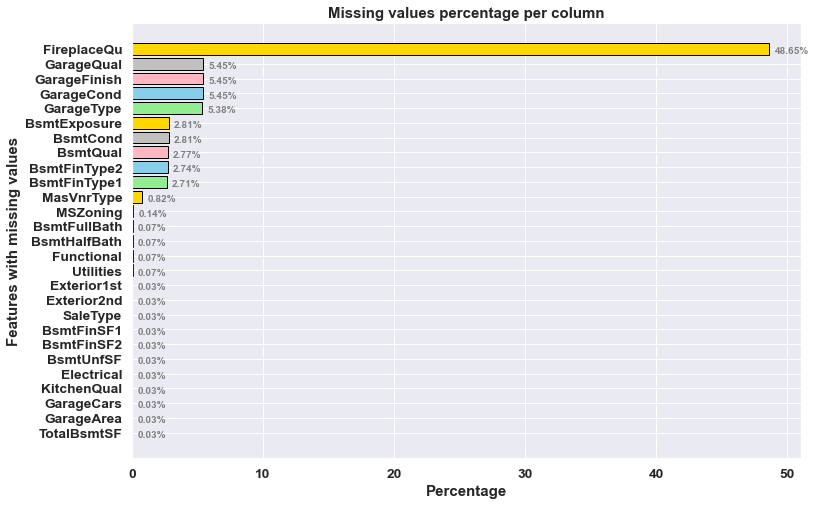

In [33]:
msv2(c)

In [34]:
d=filling_NA(c, ffill_cols)

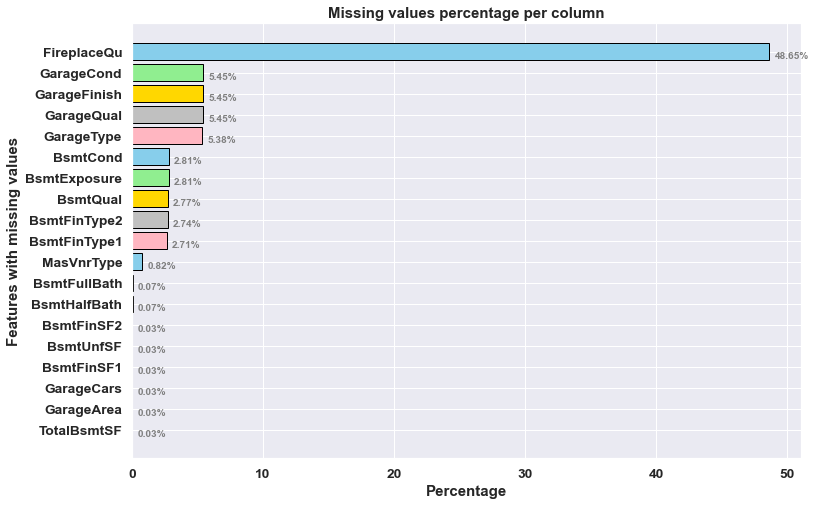

In [35]:
msv2(d)

In [36]:
fill_cols = ['KitchenQual', 'Electrical', 'SaleType', 'Exterior1st',
             'Exterior2nd', 'Utilities', 'Functional', 'MSZoning']

for col in c[fill_cols]:
    c[col] = c[col].fillna(method='ffill')

* 欠損値の少ない特徴量や、ガレージの築年数のように "0 "では埋められない値はすでに対処しています。
* 残りのほとんどが地下室とガレージに関連したもので、100個以上の欠損値があるため、数値変数は0、カテゴリ変数はNoneで埋めることにしました。
* 暖炉の品質(FireplaceQu)も欠損値は建物に暖炉がないことを表しているのでNoneで埋めます。

In [37]:
#Categorical missing values
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")

In [38]:
#Numerical missing values
for col in NAcols:
    if c[col].dtype != "object":
        c[col]= c[col].fillna(0)

In [39]:
c.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

きれいなデータセットができました。  
**続いて、新しい特徴量を作成していきます。**

# 3 . 特徴量の作成
***
家の広さは非常に重要な変数なので、すべての階と地下室の面積を合計する「**TotalArea**」という特徴量を新たに作成します。 
  
> その他に作成した特徴量
* *Bathrooms* すべてのバスルーム
* *Year average* 住宅が建設された年とリフォームされた年の合計の平均



In [40]:
c['TotalArea'] = c['TotalBsmtSF'] + c['1stFlrSF'] + c['2ndFlrSF'] + c['GrLivArea'] +c['GarageArea']

c['Bathrooms'] = c['FullBath'] + c['HalfBath']*0.5 

c['Year average']= (c['YearRemodAdd']+c['YearBuilt'])/2

# 4 . カテゴリー変数の変換
***
> ### 4.1 数値特徴量

販売月(MoSold)のように、カテゴライズされている数値変数から始めます。MoSoldの数字は月の順番であり、数値を表しているわけではないので、MoSoldをカテゴリー化します。  
その他に、売却に関わる住戸の種類(MSSubClass)、販売年(YrSold)もカテゴリー化します。

In [41]:
c['MoSold'] = c['MoSold'].astype(str)
c['MSSubClass'] = c['MSSubClass'].apply(str)
c['YrSold'] = c['YrSold'].astype(str)

> ### 4.2 One hot encoding

In [42]:
cb=pd.get_dummies(c)
print(f"the shape of the original dataset {c.shape}")
print(f"the shape of the encoded dataset {cb.shape}")
print(f"We have {cb.shape[1]- c.shape[1]} new encoded features")

the shape of the original dataset (2919, 78)
the shape of the encoded dataset (2919, 318)
We have 240 new encoded features


これで、データクリーニングと特徴量エンジニアリングの作業は終了です。ここで結合データをtrainとtestに分割します。

In [43]:
Train = cb[:na]
Test = cb[na:] 

# 5 . 外れ値の検出
***
> ### 5.1 外れ値の可視化

この部分は少し面倒なことになります。元のtrainとtestの形状を維持するために、結合されたデータセットの外れ値を処理したくありませんでした。それらを削除すると行の位置がずれてしまうからです。

* 元のtrain(a)に戻って、重要な特徴を可視化します。

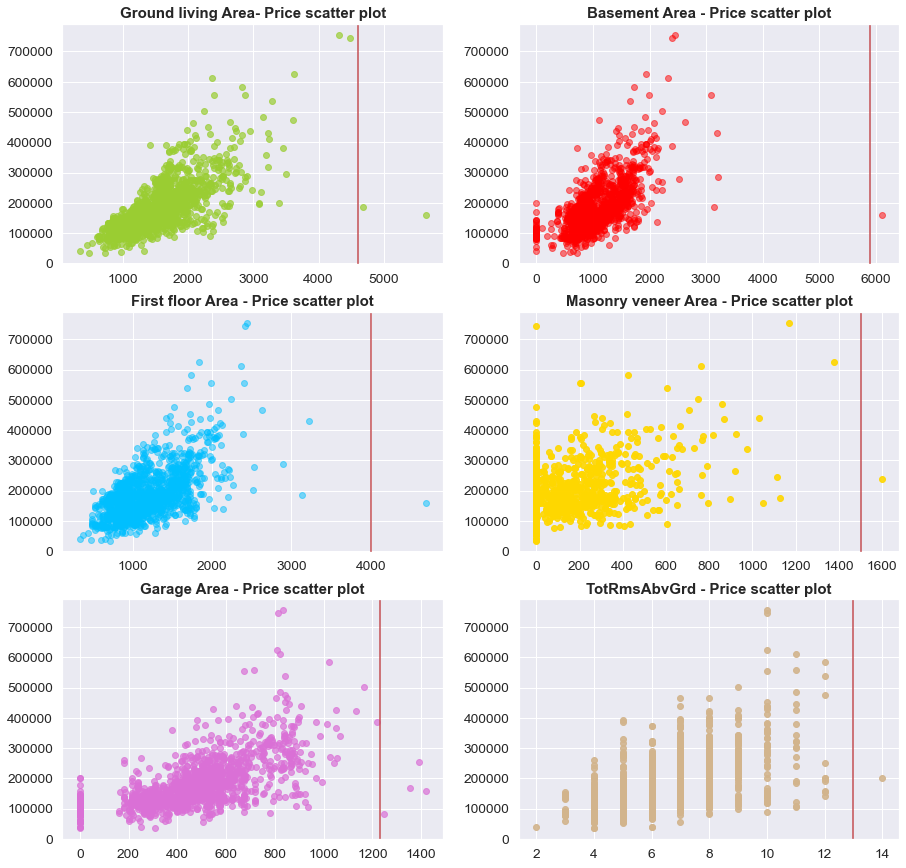

In [44]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('yellowgreen'), alpha=0.7)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=a['TotalBsmtSF'], y=a['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=a['1stFlrSF'], y=a['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=a['MasVnrArea'], y=a['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=a['GarageArea'], y=a['SalePrice'], color=('orchid'),alpha=0.7)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=a['TotRmsAbvGrd'], y=a['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

外れ値とは、面積や価値は大きいが販売価格が極端に低いポイントのことです。これらのポイントは、それぞれの特徴量をグラフ化することで現れます。

* 地下(Basement)と1階(First floor)とリビング(Ground living)の最初の外れ値は同じです。**(index番号1298の外れ値)**

> ### 5.2 外れ値の局所化

グラフに表示された外れ値を特徴量毎に表示します。

In [45]:
a['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [46]:
a['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

In [47]:
a['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [48]:
a['1stFlrSF'].sort_values(ascending=False).head(1)

1298    4692
Name: 1stFlrSF, dtype: int64

In [49]:
a['GarageArea'].sort_values(ascending=False).head(4)

1298    1418
581     1390
1190    1356
1061    1248
Name: GarageArea, dtype: int64

In [50]:
a['TotRmsAbvGrd'].sort_values(ascending=False).head(1)

635    14
Name: TotRmsAbvGrd, dtype: int64

In [51]:
train=Train[(Train['GrLivArea'] < 4676) & (Train['MasVnrArea'] < 1600)]

print(f'{Train.shape[0]- train.shape[0]}つの外れ値を削除しました。')

3つの外れ値を削除しました。


SalePriceでも外れ値が正しい外れ値であることを確認して、削除します。
* どちらも検出された外れ値と同じ価格帯を持っています。そのため、安全に削除することができます。

In [52]:
target=a[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [53]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

外れ値のインデックス位置を収集し、ターゲットからドロップします。

In [54]:
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)

*追伸：全ての外れ値を削除する事はしませんでした。これらの外れ値をフィルタリングするためには、より多くの調査が必要だからです。*

In [55]:
print('外れ値を除去した後、特徴量とターゲットの行番号が同じであることを確認します。')
print( 'Train: ',train.shape[0],'列')
print('Target:', target.shape[0],'列')

外れ値を除去した後、特徴量とターゲットの行番号が同じであることを確認します。
Train:  1457 列
Target: 1457 列


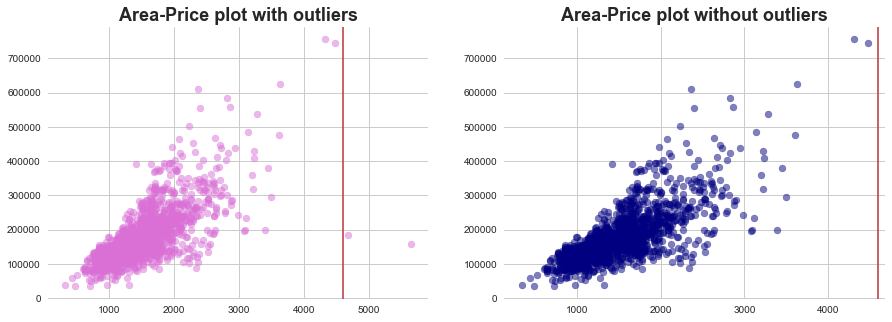

In [56]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))

# GrLivAreaの特徴量で確認
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('orchid'), alpha=0.5)
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')

ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=target['SalePrice'], color='navy', alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)
plt.show()

> ## 対数変換

機械学習の前に最後にすることは、ターゲットの分布を対数(log)変換を用いて正規分布近づけることです。

歪んだ分布に**np.log1p**を適用することで対数変換することができます。

In [57]:
from scipy.stats import skew

In [58]:
print(f"対数変換前の歪度: {target['SalePrice'].skew()}")
print(f"対数変換前の尖度: {target['SalePrice'].kurt()}")

対数変換前の歪度: 1.8829247000823222
対数変換前の尖度: 6.527120338179705


In [59]:
# ターゲットを対数変換する
target["SalePrice"] = np.log1p(target["SalePrice"])

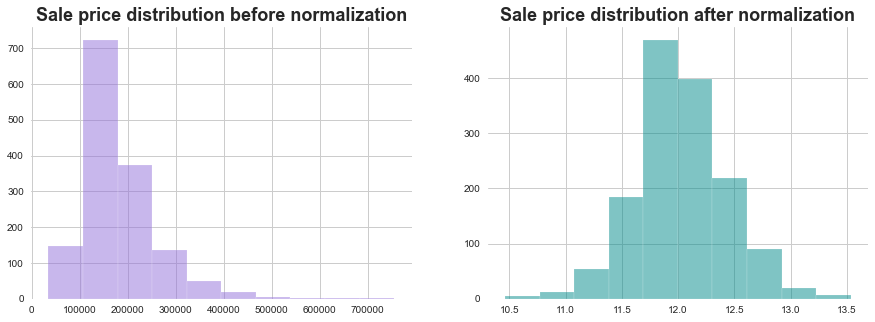

In [60]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(a.SalePrice, bins=10, color='mediumpurple',alpha=0.5)
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)

ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

In [61]:
print(f"対数変換後の歪度: {target['SalePrice'].skew()}")
print(f"対数変換後の尖度: {target['SalePrice'].kurt()}")

対数変換後の歪度: 0.12299462625722293
対数変換後の尖度: 0.8062416349541661


対数変換後の歪度と尖度の値は問題ないように見えます。これで機械学習に進むことができます。

*追伸：元のSalePriceの値を取り戻すために、最後にnp.expm1を適用して、log1p変換をキャンセルします。

# 6 . 機械学習
***
> ### 6.1  前処理

特徴量とターゲットを設定して機械学習を開始します。
* Features : x
* Target : y

In [62]:
x=train
y=np.array(target)

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)

外れ値に対して強力なので、データのスケーリングにRobustScalerを使用します。

In [64]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(Test)

基本的な線形回帰モデルをから始めていきます。
* より良い誤差推定値を得るために、5つに分けてクロスバリデーションを行います。
 
> ### 6.2 線形回帰


In [65]:
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))

-6785255.903909812
RMSE = 2604.852376605978


* Ridge, Lasso, ElasticNetなどの回帰手法を用いて、二乗誤差を小さくします。

> ### 評価指標はRMSEを使用します。

In [66]:
def score(y_pred):
    return str(math.sqrt(sklm.mean_squared_error(y_test, y_pred)))

> ### 6.3 正則化

>> ## Ridge regression
* リッジ回帰では過学習を抑えることが出来ます。
* trainの誤差とtestの誤差を最小にする**alpha**値を見つける必要があります。

In [67]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print(f"ベストパラメータ : {ridge_reg.best_params_}")
print(f"ベストスコア : {math.sqrt(-ridge_reg.best_score_)}")
ridge_pred=math.sqrt(-ridge_reg.best_score_)

ベストパラメータ : {'alpha': 22}
ベストスコア : 0.11578672406353513


In [68]:
ridge_mod=Ridge(alpha=17)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print(f'RMSE : train = {str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train)))}')
print(f'RMSE : test = {score(y_pred_test)}')   

RMSE : train = 0.09368001055381958
RMSE : test = 0.11470954585525225


* 次にラッソ回帰を試します。ラッソ回帰はリッジ回帰と似ていますが、ラッソ回帰はゼロが多く、非ゼロが少ない傾向があります。言い換えれば、ラッソ回帰は有益でない特徴量を削除し、重要な特徴量だけを残します。
* リッジ回帰と同様に、誤差を罰する**alpha**値を見つける必要があります。

>> ## Lasso regression

In [69]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[10, 1, 0.1, 0.01, 0.001, 0.0001, 0.0003, 0.0005, 0.0007, 0.00075]}


lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print(f'ベストパラメータ: {lasso_reg.best_params_}')

ベストパラメータ: {'alpha': 0.0007}


In [70]:
lasso_mod=Lasso(alpha=0.0007)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print(f'RMSE : train = {str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train)))}')
print(f'RMSE : test = {score(y_lasso_test)}')

RMSE : train = 0.09717319271316066
RMSE : test = 0.11146588615892472


* 次に、モデルが予測を行うために使用した重要な特徴量を確認します。
* 無用な特徴量には係数0を与え、重要な特徴量には係数を使ってグラフを作成します。

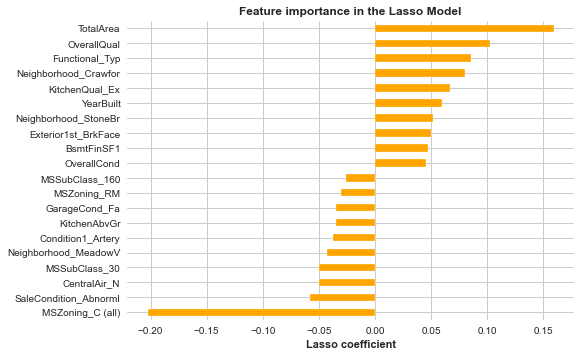

In [71]:
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='orange')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

一番重要な特徴量は、今回作った「**TotalArea**」です。
* 他にも、全体的な品質や地域性などが重要な特徴量となっています。

In [72]:
print(f"ラッソ回帰では、{sum(coefs != 0)}個の有益な特徴量を維持し、{sum(coefs == 0)}個の無益な特徴量を削除しました。")

ラッソ回帰では、97個の有益な特徴量を維持し、221個の無益な特徴量を削除しました。


次に、ElasticNetを試します。
* ElasticNetとは、ridgeとLassoの両方を組み合わせた折衷案です。
* クロスバリデーションを使って折衷案を見つけます。

>> ## ElasticNet

In [73]:
from sklearn.linear_model import ElasticNetCV

alphas = [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.0003, 0.0005, 0.0006, 0.00055]
l1ratio = [0.1, 0.3, 0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('RMSE : test = '+ str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)

RMSE : test = 0.11213304089840478
0.00055


alphaを丸めるナンバリングを試してみたところ、0.00055が良いスコアを出すことが分かりました。

In [74]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.00055]
l1ratio = [0.1, 0.3, 0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print(f'RMSE : test = {score(ela_pred)}')
print(elastic_cv.alpha_)
print(elastic_cv.l1_ratio_)



RMSE : test = 0.11213304089840478
0.00055
0.99


<h1>回帰分析のまとめ</h1>
回帰分析では、Ridge(L2)、Lasso(L1)、L2とL1の折衷案であるElasticNetの3つのアルゴリズムを使用しました。  次のセクションに移る前に、上記の作業を簡単に行う関数を紹介します。
<br>
<br>
<br>
<br>
1. データをtrain/testに分割<br>
2. データのスケーリング<br>
3. ハイパーパラメータのチューニングのためのグリッドサーチ<br>
4. 目標を予測する<br>
5. 予測を評価する<br>
<br>
<br>
<br>
入力値:<br>
- x : 特徴量<br>
- y : ターゲット<br>
- モデル : Ridge(default), Lasso, ElasticNetCV<br>
- スケーリング : RobustScaler(default), MinMaxScaler, StandardScaler<br>

In [75]:
def regularization(x,y,modelo=Ridge, scaler=RobustScaler):


    #データをtrain/testに分割
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)
    
    #データのスケーリング : RobustSclaer(default)
    from sklearn.preprocessing import RobustScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    
    scaler= scaler()
    # transform "x_train"
    x_train = scaler.fit_transform(x_train)
    # transform "x_test"
    x_test = scaler.transform(x_test)
    #Transform the test set
    X_test= scaler.transform(Test)
    
    if modelo != ElasticNetCV:
        if modelo == Ridge:
            parameters= {'alpha':[x for x in range(1,101)]}
        elif modelo == Lasso:
            parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
            
        model=modelo()
            
        model=ms.GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
        model.fit(x_train,y_train)
        y_pred= model.predict(x_test)

        #print("The best value of Alpha is: ",model.best_params_)
        print("best_score : %s, RMSE = %s" %(model.best_params_,
                  score(y_pred)))
    elif modelo == ElasticNetCV:
        alphas = [0.00055]
        l1ratio = [0.1, 0.3, 0.5, 0.9, 0.95, 0.99, 1]

        elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

        elasticmod = elastic_cv.fit(x_train, y_train.ravel())
        ela_pred=elasticmod.predict(x_test)
        print("best_score : alpha %s and l1_ratio %s, RMSE = %s"
              %(elastic_cv.alpha_,elastic_cv.l1_ratio_, score(ela_pred)))
        
            

  

In [76]:
regularization(x,y,Ridge)

best_score : {'alpha': 22}, RMSE = 0.11464043542983986


In [77]:
regularization(x,y, Lasso)

best_score : {'alpha': 0.0009}, RMSE = 0.11139176644852013


In [78]:
regularization(x,y, ElasticNetCV)

best_score : alpha 0.00055 and l1_ratio 0.99, RMSE = 0.11213304089840478


> ### 6.4 XGB REGRESSOR

XGBRegressorも試してみます。

In [79]:
from xgboost.sklearn import XGBRegressor

#xg_reg = XGBRegressor()
#xgparam_grid= {'learning_rate' : [0.01],'n_estimators':[2000, 3460, 4000],
#                                     'max_depth':[3], 'min_child_weight':[3,5],
#                                     'colsample_bytree':[0.5,0.7],
#                                     'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
#                                    'reg_lambda':[1,0.01,0.8,0.001,0.0001]}

#xg_grid=GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#xg_grid.fit(x_train,y_train)
#print(xg_grid.best_estimator_)
#print(xg_grid.best_score_)

ModuleNotFoundError: No module named 'xgboost'

上ではXGBRegressorのパラメータチューニングを行っていますが、実行に時間がかかります。ベストスコアを下のモデルにコピーしました。

In [80]:
xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print(f'RMSE : test = {score(xg_pred)}')

NameError: name 'XGBRegressor' is not defined

> ### 6.5 アンサンブル手法
>> ## VOTING REGRESSOR
* VotingRegressorとは、個々の予測値を平均化して最終的な予測値を形成する手法です。

In [81]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), 
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print(f'RMSE : test = {score(vote_pred)}')

NameError: name 'xgb' is not defined

>> ## Stacking

XGBoostをメタリグレッサーとして前回のモデルをすべてスタックします。

In [82]:
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor=xgb, use_features_in_secondary=True
                          )

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print(f'RMSE : test = {score(stacking_pred)}')

ModuleNotFoundError: No module named 'mlxtend'

* 最後にやるべきことは、回帰モデルを平均化し、テストデータセットに適合させることです。

>> ## Averaging Regressors

In [83]:
#We coefficients were assigned manually
final_test=(0.3*vote_pred + 0.5*stacking_pred + 0.2*y_lasso_test)
print(f'RMSE test=  {score(final_test)}')


NameError: name 'vote_pred' is not defined

上位3つのモデルを平均化しました。Stackingモデル、VotingRegressorモデル、lassoモデルの3つのモデルを平均化すると、最高の結果が得られました。(**RMSEが最も低い結果**)
* 3つのモデルに割り当てられた係数は手動でテストしました。

> ### 6.6 テストデータにモデルを適合させる

テストデータにモデルを当てはめていきます。

* 以前、データ処理で行った **対数変換** をキャンセル(np.expm1)して、数値を元の形に変換します。

In [84]:
#VotingRegressor
vote_test = vote_mod.predict(X_test)
final1=np.expm1(vote_test)

#StackingRegressor
stack_test = stregr.predict(X_test)
final2=np.expm1(stack_test)

#LassoRegressor
lasso_test = lasso_mod.predict(X_test)
final3=np.expm1(lasso_test)


NameError: name 'vote_mod' is not defined

**3つのモデルを合わせて平均化した最終的なモデル**。

In [85]:
final=(0.2*final1 + 0.6*final2 + 0.2*final3)

submission = pd.DataFrame({
        "Id": b["Id"],
        "SalePrice": final
    })
submission.to_csv("./output/submission.csv", index=False)
submission.head()

NameError: name 'final1' is not defined